# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Técnicas Avançadas de Captura e Tratamento de Dados</span>

## <span style="color:blue">Avaliação Final</span>
**Luis Gustavo Nonato** e **Moacir Antonelli Ponti**<br>

**Cemeai - ICMC/USP São Carlos**

A avaliação vale 10 pontos. As questões de 1 a 4, caso respondidas da forma correta, já totalizam 10 pontos.


<font color='red'>**ATENÇÃO:** Quando terminar o exame, você deve fazer um "upload" do notebook no _moodle_</font>.

### Questão 1 (2.5 pontos)
Considere o arquivo <font style="font-family: monaco"> modcovid.pdf </font> (disponível para download no moodle). Escreva um código para extrair o texto (ASCII) do arquivo PDF e escreva o texto extraído em um arquivo chamado ``modcovid.txt``.


In [1]:
#importando as bibliotecas
import os
import glob
import shutil
from PIL import Image 
import pytesseract 
from pdf2image import convert_from_path 
import pytesseract as ocr

In [9]:
#criando uma pasta para armazenar os conteúdos que vamos processar dessa imagem em pdf
def cria_pasta (nome_pdf):
    '''
    Função que cria uma pasta a partir do nome do arquivo em pdf.
    Inicialmente a função verifica se a pasta existe, se existir, ela é sobrescrita, se não, uma nova é criada.
    '''
    nome_pasta = nome_pdf.split('.')[0]
    pasta = './{}_imagens'.format(nome_pasta)
    for i in pasta:
        if os.path.exists(pasta):
            shutil.rmtree(pasta)
            os.mkdir(pasta)
        else:
            os.mkdir(pasta)
        return(pasta)   
    
#aprocando a função para criar a pasta a partir do nome do nosso arquivo
filename = 'modcovid.pdf'
diretorio = cria_pasta(filename)

In [11]:
#processando o pdf e transformando em imagem

#transformação do arquivo pdf com convert_from_path
imagem_paginas = convert_from_path('{}/{}'.format(diretorio,filename)) 

#salvando as imagens no diretorio indicado, no formato png
for i,pagina in enumerate(imagem_paginas): 
    file = '{}/img_'.format(diretorio)+str(i)+'.png'
    print('salvando página: ',file)
    pagina.save(file, 'PNG') 
    print('done')

salvando página:  ./modcovid_imagens/img_0.png
done


In [15]:
#extraindo texto da imagem criada

#abrindo a imagem
im = Image.open(file)

#aplicando o ocr e verificando o texto contido
img = ocr.image_to_string(im, lang='por')
print(img)

Ferramenta matemática ajuda a planejar isolamento intermitente em SP

Modelo aponta momentos em que cada cidade poderia ter mais ou menos restrições

Medidas de controle são fundamentais para resguardar o sistema de saúde diante da
pandemia de Covid-19. O protocolo de distanciamento social têm sido adotado na maior parte
dos países e também no Brasil. Pesquisadores unem esforços e utilizam a matemática para
estudar algumas questões: Por quanto tempo o protocolo deve ser mantido para se evitar o
colapso do sistema de saúde? Cientes de que a evolução da doença não se encontra no mesmo
estágio em todas as cidades e que a capacidade hospitalar varia muito em cada região, deve-se
implantar o mesmo protocolo de distanciamento de forma homogênea em todas cidades e no
mesmo momento? Deve-se amenizar o protocolo também de forma homogênea em todo o
estado?

O grupo denominado ModCovid19, formado por uma parceria entre pesquisadores do
Instituto de Ciências Matemáticas e de Computação, da USP São

In [26]:
#extraindo texto da imagem criada e armazenando num arquivo txt
txt_name = 'modcovid.txt'
arquivo = open('./{}/{}'.format(diretorio, txt_name), 'w')
arquivo.writelines(img)
arquivo.close()
print('done')

done


In [36]:
print(arquivo)

<_io.TextIOWrapper name='././modcovid_imagens/modcovid.txt' mode='r' encoding='cp1252'>


### Questão 2 (2.5 pontos)
Leia o arquivo ``modcovid.txt`` e realize as seguinte operações:
1. Extraia todas palavras contidas no arquivo e armazene em uma lista de palavras (utilize o método <font color='blue'>word_tokenize</font> do pacote <font color='blue'>nltk</font>.
2. Remova da lista de palavras todos os "palavras" que não sejam formadas exclusivamente de caracteres do alfabeto.
3. Quantas palavras com apenas 1 caractere sobraram na lista?

In [2]:
#importando as bibliotecas
import nltk
import glob
import string

In [4]:
#1
#abrindo e lendo arquivo com o conjunto de strings que vou processar
file = glob.glob('./modcovid_imagens/modcovid.txt')

docs = ''
for fname in file:
     with open(fname,'r') as f:
        docs = docs+' '+f.read()
        
print(file)

['./modcovid_imagens/modcovid.txt']


In [101]:
#1
#tokenização das palavras e armazenamento na lista 'words'
words = nltk.word_tokenize(docs) # extrai as palavras
print(words[:50])

['Ferramenta', 'matemática', 'ajuda', 'a', 'planejar', 'isolamento', 'intermitente', 'em', 'SP', 'Modelo', 'aponta', 'momentos', 'em', 'que', 'cada', 'cidade', 'poderia', 'ter', 'mais', 'ou', 'menos', 'restrições', 'Medidas', 'de', 'controle', 'são', 'fundamentais', 'para', 'resguardar', 'o', 'sistema', 'de', 'saúde', 'diante', 'da', 'pandemia', 'de', 'Covid-19', '.', 'O', 'protocolo', 'de', 'distanciamento', 'social', 'têm', 'sido', 'adotado', 'na', 'maior', 'parte']


In [102]:
#2
#remoção de termos que não são alfanuméricos segundo a lista ASCII
words1 = [w.lower() for w in words if w.isalpha()]  
print(words1[:50])

['ferramenta', 'matemática', 'ajuda', 'a', 'planejar', 'isolamento', 'intermitente', 'em', 'sp', 'modelo', 'aponta', 'momentos', 'em', 'que', 'cada', 'cidade', 'poderia', 'ter', 'mais', 'ou', 'menos', 'restrições', 'medidas', 'de', 'controle', 'são', 'fundamentais', 'para', 'resguardar', 'o', 'sistema', 'de', 'saúde', 'diante', 'da', 'pandemia', 'de', 'o', 'protocolo', 'de', 'distanciamento', 'social', 'têm', 'sido', 'adotado', 'na', 'maior', 'parte', 'dos', 'países']


In [103]:
#3
#contando termos alfanuméricos que possuem apenas 1 caractere
words2 = [w for w in words1 if len(w) == 1]
print(words2[:50])

['a', 'o', 'o', 'e', 'e', 'a', 'o', 'o', 'a', 'e', 'a', 'o', 'e', 'o', 'o', 'o', 'e', 'e', 'e', 'e', 'e', 'a', 'e', 'à', 'à', 'e', 'e', 'e', 'o', 'a', 'o', 'o', 'a', 'a', 'é', 'o', 'a', 'o', 'e', 'o', 'o', 'o', 'o', 's']


In [104]:
#quantidade de palavras
print('quantidade de termos totais: ', len(words))
print('quantidade de termos alfanuméricos: ', len(words1))
print('quantidade de termos alfanuméricos com apenas 1 caractere: ', len(words2))

quantidade de termos totais:  408
quantidade de termos alfanuméricos:  345
quantidade de termos alfanuméricos com apenas 1 caractere:  44


### Questão 3 (2.5 pontos)

Antes de começar, carregue o arquivo `artists.csv` e armazene em um pandas DataFrame.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("artists_mba.csv")
df.head()

,name,years,genre,nationality,bio,wikipedia,paintings
0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


#### a) (0.5 pontos)

Crie um novo atributo no dataframe, chamado `birth`, pegando os 4 primeiros caracteres do atributo `years` e convertendo para inteiro.

Posteriormente, exiba o tipo do novo atributo e a estatística descritiva do novo atributo linhas usando a função `describe()`

In [4]:
#criando a coluna birth com os 4 primeiros carcateres da variável years
df['birth'] = df['years'].apply(lambda x: x[:5])

#alterando o formato para inteiro
df['birth'] = df['birth'].astype(int)
df.head()

,name,years,genre,nationality,bio,wikipedia,paintings,birth
0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193,1884
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88,1866
2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70,1886
3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73,1840
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194,1898


In [5]:
#verificando o tipo da variável
df.dtypes

name           object
years          object
genre          object
nationality    object
bio            object
wikipedia      object
paintings       int64
birth           int32
dtype: object

In [6]:
#estatatística descritiva da coluna 'birth'
df['birth'].describe()

count      53.000000
mean     1729.358491
std       203.256573
min      1100.000000
25%      1571.000000
50%      1839.000000
75%      1872.000000
max      1928.000000
Name: birth, dtype: float64

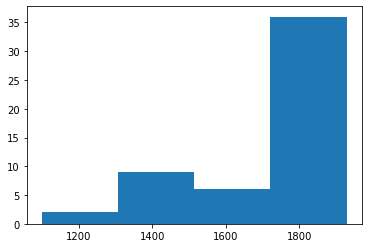

In [7]:
#plotando um histograma para exibir os anos que aparecem com mais frequência
plt.hist(df['birth'], bins = 4)
plt.show()

#### b) (1 ponto)

Execute uma função que identifique outliers com base no intervalo interquartil.
Mostre as linhas referentes a outliers detectados por esse método no atributo `paintings` para valores para além de mais ou menos $2 \times IQR$.

In [41]:
def exibe_outliers(nome):
    if np.issubdtype(df[nome].dtype, np.number):
        #cálculo dos quartis Q1 e Q3
        Q1 = df[nome].quantile(0.25)
        Q3 = df[nome].quantile(0.75)
        #cálculo do IQR
        IQR = Q3 - Q1
        # apenas outliers segundo o critério IQR
        outliers = df[(df[nome] < Q1-(IQR*2)) | (df[nome] > Q3+(IQR*2))]
        print(outliers[nome])
    else:
        print(nome, '----> não é variável numérica')

In [42]:
#exibindo a quantidade de outliers dentro do dataframe df
outlier('paintings')

8      877
13     439
30     702
51    4920
Name: paintings, dtype: int64


#### c) (1 ponto)

Crie um novo atributo numérico, codificando em inteiros o atributo `nationality`. Posteriormente, compute a correlação de Pearson entre esse novo atributo e o atributo `paintings`

In [69]:
df.head()

,name,years,genre,nationality,bio,wikipedia,paintings,birth
0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193,1884
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88,1866
2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70,1886
3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73,1840
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194,1898


array(['Italian', 'Russian', 'Mexican', 'French', 'Belgian', 'Spanish',
       'Dutch', 'Austrian', 'Flemish', 'Spanish,Greek', 'German',
       'French,British', 'French,Jewish,Belarusian', 'British',
       'Norwegian', 'German,Swiss', 'American', 'Brazilian'], dtype=object)

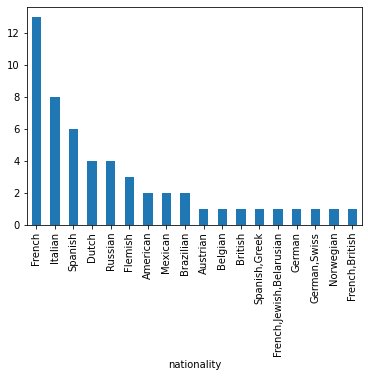

In [80]:
#plotando um gráfico de barras com a frequência da nacionalidade dos pintores
df.groupby('nationality').size().sort_values(ascending=False).plot(kind='bar')
df['nationality'].unique()

In [81]:
#codificando a variável nacionality de valores categóricos p/ numéricos, sem ordenação definida
cat_nacionality = df['nationality'].unique()
num_nacionality = np.arange(df['nationality'].unique().shape[0])
print(cat_nacionality)
print(num_nacionality)

map_macionality = dict(zip(cat_nacionality, num_nacionality))
print("\nDicionário:")
print(map_macionality)

['Italian' 'Russian' 'Mexican' 'French' 'Belgian' 'Spanish' 'Dutch'
 'Austrian' 'Flemish' 'Spanish,Greek' 'German' 'French,British'
 'French,Jewish,Belarusian' 'British' 'Norwegian' 'German,Swiss'
 'American' 'Brazilian']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]

Dicionário:
{'Italian': 0, 'Russian': 1, 'Mexican': 2, 'French': 3, 'Belgian': 4, 'Spanish': 5, 'Dutch': 6, 'Austrian': 7, 'Flemish': 8, 'Spanish,Greek': 9, 'German': 10, 'French,British': 11, 'French,Jewish,Belarusian': 12, 'British': 13, 'Norwegian': 14, 'German,Swiss': 15, 'American': 16, 'Brazilian': 17}


In [82]:
#aplicando a função map na coluna desejada
df['nationality_cod'] = df['nationality'].map(map_macionality)
df.head()

,name,years,genre,nationality,bio,wikipedia,paintings,birth,nationality_cod
0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193,1884,0
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88,1866,1
2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70,1886,2
3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73,1840,3
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194,1898,4


In [97]:
#criando um novo dataframe para computar a correlação de Pearson entre esse novo atributo e o atributo paintings
df_corr = df[['nationality_cod', 'paintings']]
df_corr.head()

,nationality_cod,paintings
0,0,193
1,1,88
2,2,70
3,3,73
4,4,194


In [100]:
#exibindo a correlação
df_corr.corr()

,nationality_cod,paintings
nationality_cod,1.000000,0.318661
paintings,0.318661,1.000000


### Questão 4 (2.5 pontos)

Dada uma imagem `painting.jpg` de uma pintura da qual não sabemos o artista, gostaríamos de fazer uma busca numa base de dados e recuperar obras similares. Para isso utilizaremos uma composição de descritores:
1. Histograma de cores (R, G, B) considerando 4 bins por canal de cor (total 12 características)
2. Descritor LBP utilizando raio 2.5 e 16 pontos (total 18 características).

Concatene esses dois descritores e use-o como descritor de cor e textura da imagem. Faça uma busca no diretório `paintings`, retornando as 5 imagens mais similares de acordo com esse descritor e a distância Euclidiana. Exiba a imagem de consulta e também as 5 imagens retornadas, com seus nomes e valor da distância obtido.

In [2]:
# inclua os pacotes necessários e as funções necessárias
import imageio
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import feature
import matplotlib
matplotlib.axes.Axes.imshow
matplotlib.pyplot.imshow
matplotlib.transforms.Affine2D
%matplotlib inline

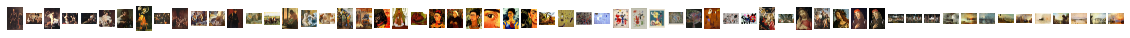

In [5]:
#carregando as imagens a partir do diretorio
img_consulta = imageio.imread('./paintings/paintings/painting.jpg')
files = glob.glob('./paintings/paintings/*g') 
n = len(files)                    

fig,ax = plt.subplots(1, n, figsize=(20, 20))    

imgs1 = dict()
for i,f in enumerate(files):
    imgs1[i] = f
    image = Image.open(f)
    
    ax[i].axis('off')
    ax[i].imshow(image) 
#fig.tight_layout()

In [11]:
imgs1

{0: './paintings/paintings\\Caravaggio_1.jpg',
 1: './paintings/paintings\\Caravaggio_10.jpg',
 2: './paintings/paintings\\Caravaggio_2.jpg',
 3: './paintings/paintings\\Caravaggio_3.jpg',
 4: './paintings/paintings\\Caravaggio_4.jpg',
 5: './paintings/paintings\\Caravaggio_5.jpg',
 6: './paintings/paintings\\Caravaggio_6.jpg',
 7: './paintings/paintings\\Caravaggio_7.jpg',
 8: './paintings/paintings\\Caravaggio_8.jpg',
 9: './paintings/paintings\\Caravaggio_9.jpg',
 10: './paintings/paintings\\Edgar_Degas_1.jpg',
 11: './paintings/paintings\\Edgar_Degas_10.jpg',
 12: './paintings/paintings\\Edgar_Degas_2.jpg',
 13: './paintings/paintings\\Edgar_Degas_3.jpg',
 14: './paintings/paintings\\Edgar_Degas_4.jpg',
 15: './paintings/paintings\\Edgar_Degas_5.jpg',
 16: './paintings/paintings\\Edgar_Degas_6.jpg',
 17: './paintings/paintings\\Edgar_Degas_7.jpg',
 18: './paintings/paintings\\Edgar_Degas_8.jpg',
 19: './paintings/paintings\\Edgar_Degas_9.jpg',
 20: './paintings/paintings\\Frida_Kah

In [13]:
#definicao distancia euclidiana
def Euclidean_distance(A, B):
    """ Calcula a distancia Euclidiana entre dois vetores de mesmo tamanho"""
    return  np.sqrt( np.sum((A-B)**2) )

imgQ = imageio.imread(img_consulta)

In [16]:
#histograma de cores
def histograma_global(img, bins):
    
    # um único canal de cor
    if (len(img.shape) == 2):
        hist,_ = np.histogram(img, bins=bins)
        
    # mais do que um canal de cor RGB
    if (len(img_consulta.shape) == 3):
        hist_R,_ = np.histogram(img[:,:,0], bins=bins)
        hist_G,_ = np.histogram(img[:,:,1], bins=bins)
        hist_B,_ = np.histogram(img[:,:,2], bins=bins)
        hist = np.concatenate([hist_R, hist_G, hist_B])
        
    # normaliza o vetor resultante pela soma dos valores
    hist = hist.astype("float")
    hist /= (hist.sum() + 0.0001)        
    return hist


C:\Users\2104411064\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


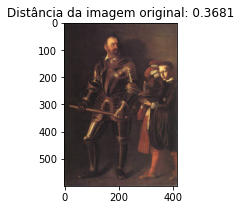

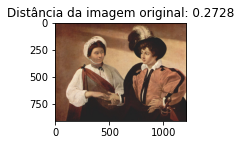

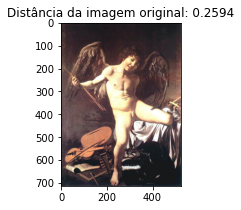

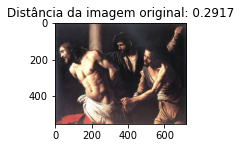

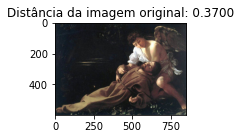

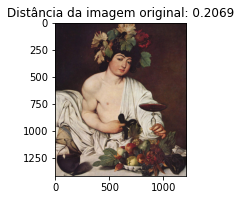

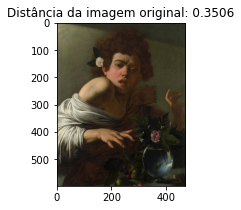

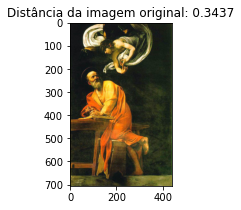

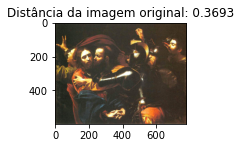

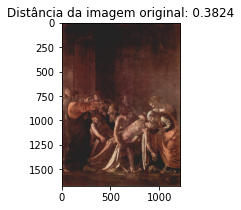

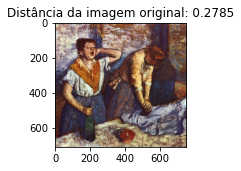

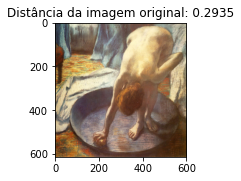

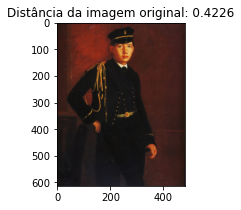

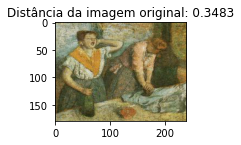

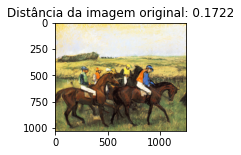

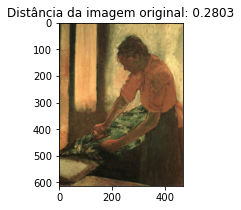

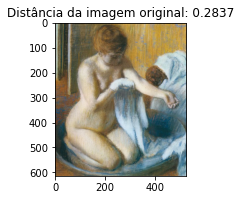

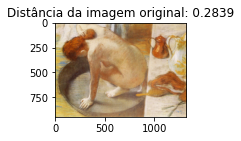

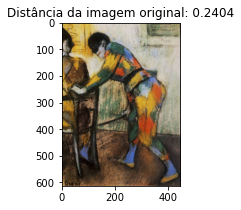

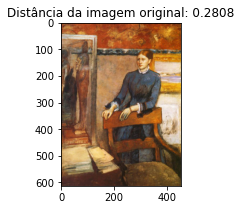

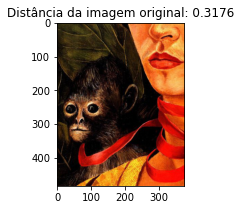

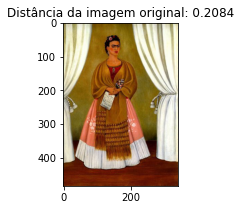

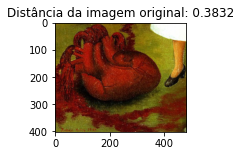

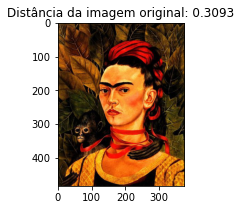

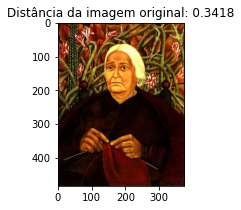

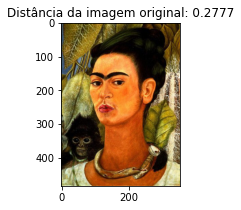

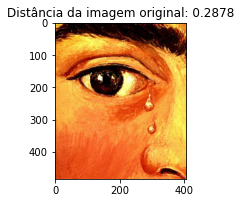

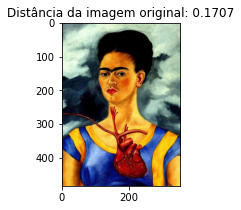

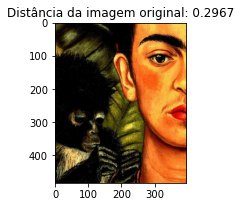

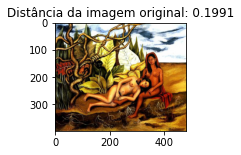

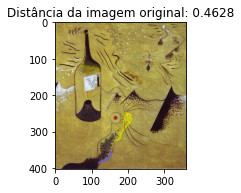

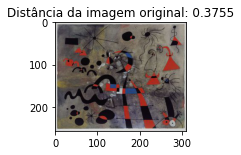

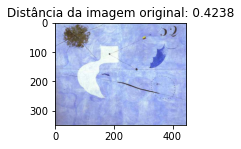

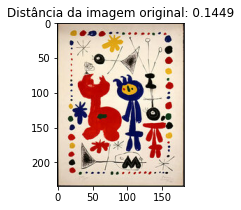

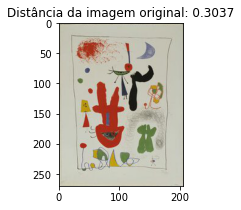

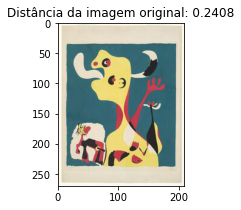

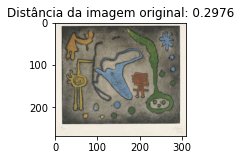

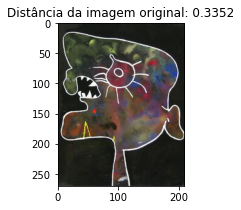

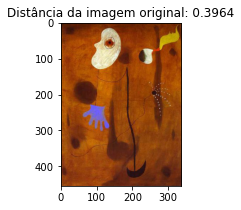

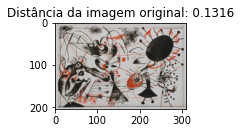

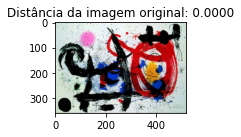

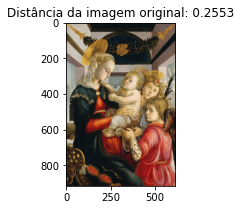

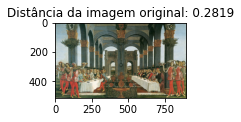

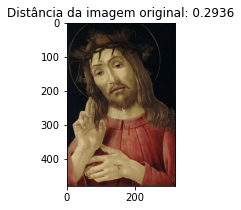

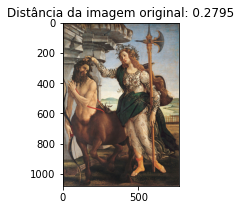

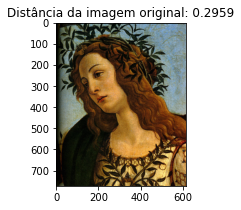

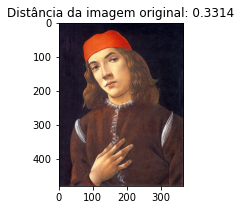

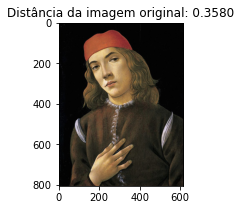

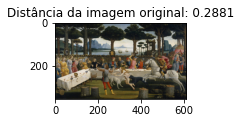

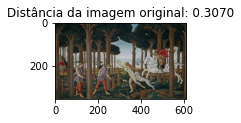

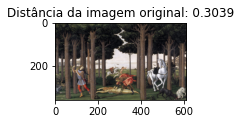

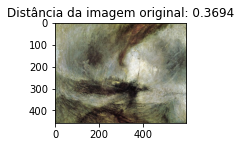

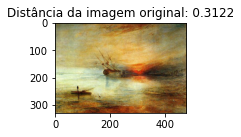

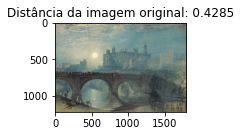

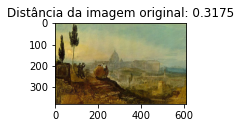

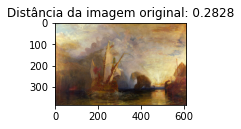

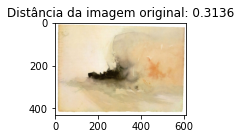

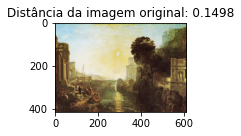

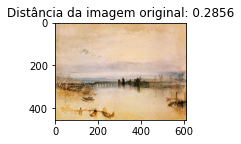

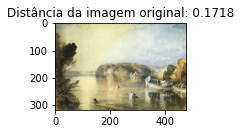

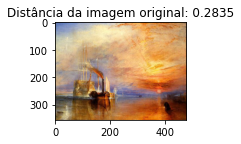

In [85]:
#exibindo as distâncias das imagens em relação à imagem imagem consulta
for i, v in imgs1.items():
    img = imageio.imread(v)
    hist = histograma_global(img, 4)
    dQ_H = Euclidean_distance(HQ, hist)
    plt.figure(figsize=(8,3))
    #plt.subplot(131); plt.imshow(img_consulta); plt.title('Consulta')
    plt.subplot(132); plt.imshow(img); plt.title('Distância da imagem original: %.4f' %dQ_H)
    

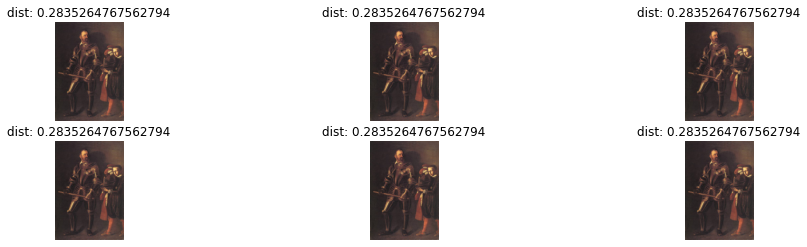

In [106]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,4))

for (y, dist), ax in zip(imgs1.items(), axes.flat):
    ax.imshow(img1)
    ax.set_title('dist: {}'.format(dQ_H))#, 'label: {}'.format(img1.values()))
    ax.axis('off')
plt.show()
    

In [69]:
def lbp_features(img, points, radius):
    
    # LBP opera em imagens de um só canal, aqui vamos converter
    # RGB para escala de cinza usando o método Luminance
    img_gray = img[:,:,0].astype(float)*0.3 + img[:,:,1].astype(float)*0.59 + img[:,:,2].astype(float)*0.11
    
    # aqui definimos o numero de pontos e o raio, padrao = 8, 1
    lbp = feature.local_binary_pattern(img_gray.astype(np.uint8), points, radius, method="uniform")
    
    # lbp retorna um matriz com os códigos, então devemos extraír o histograma
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, points + 3), range=(0, points + 2))
    
    # normaliza o histograma
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    
    # return the histogram of Local Binary Patterns
    return hist

In [70]:
lbp_features(img_consulta, 2.5, 16)

array([0.29172509, 0.40086042, 0.30741449, 0.        , 0.        ])